In [1]:
# Import necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import re
import csv


# Function to load and sort images by natural order
def load_images(directory):
    # Helper functions for natural sorting
    def atoi(text):
        return int(text) if text.isdigit() else text

    def natural_keys(text):
        return [atoi(c) for c in re.split(r'(\d+)', text)]

    # Load and sort images
    images = []
    for filename in sorted(os.listdir(directory), key=natural_keys):
        if filename.endswith(".tif"):
            filepath = os.path.join(directory, filename)
            images.append(cv2.imread(filepath))
    return images

# Function to preprocess images (convert to grayscale, blur, and threshold)
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    adaptive_thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 2)
    inverted_binary = cv2.bitwise_not(adaptive_thresh)  # Invert the binary image
    return inverted_binary

# Function to find petri dishes using HoughCircles
def find_petri_dishes(image, min_radius, max_radius):
    circles = cv2.HoughCircles(
        image,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=50,
        param1=100,
        param2=30,
        minRadius=min_radius,
        maxRadius=max_radius,
    )
    
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        return [(x, y, r) for x, y, r in circles]
    else:
        return []

# Function to measure the density and variation of the bacterial lawn
def measure_density_and_variation(cropped_binary_image, cropped_gray_image):
    density = np.mean(cropped_gray_image)
    variation = np.std(cropped_gray_image)
    return density, variation

# Function to draw circles around petri dishes and label them
def draw_petri_dishes(image, petri_dishes):
    output = image.copy()
    for index, (x, y, r) in enumerate(petri_dishes):
        center = (x, y)
        cv2.circle(output, center, r, (0, 255, 0), 2)
        
        # Add the label text
        label = f'Plate {index + 1}'
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 3
        font_color = (255, 255, 255)
        font_thickness = 2
        cv2.putText(output, label, (x - r, y - r), font, font_scale, font_color, font_thickness)
        
    return output

# function to export the data to a csv file
def export_to_csv(filename, header, data):
    with open(filename, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(header)
        csv_writer.writerows(data)
        


Add the path to the image files here:

In [5]:
# path to folder with images 
# note that the images are not on github due to size limitations
# please contact the authors if you would like raw images
path_to_images = 'S_SE_20230406'

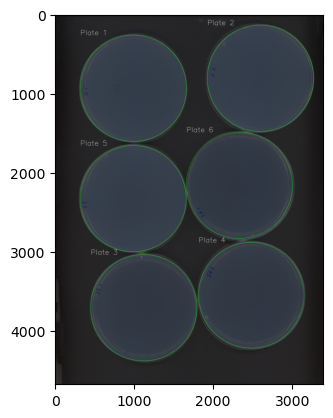

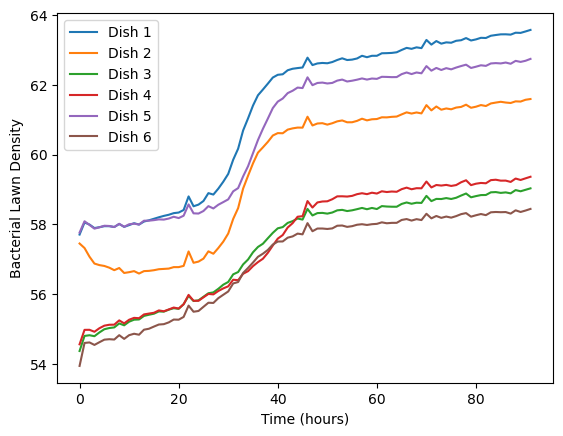

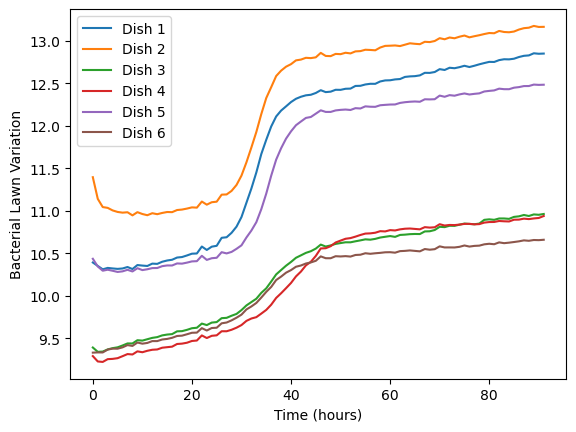

In [3]:
# Main script to load and process images, find petri dishes, and visualize results

directory = path_to_images
images = load_images(directory)

min_radius = 662
max_radius = 676

first_image = images[0]
binary_first_image = preprocess_image(first_image)
petri_dishes = find_petri_dishes(binary_first_image, min_radius, max_radius)

image_with_rectangles = draw_petri_dishes(first_image, petri_dishes)
plt.imshow(cv2.cvtColor(image_with_rectangles, cv2.COLOR_BGR2RGB))
plt.show()

densities = []
variations = []

for image in images:
    binary_image = preprocess_image(image)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    dish_densities = []
    dish_variations = []

    # Measure densities and variations for each petri dish
    for x, y, r in petri_dishes:
        cropped_gray_image = gray_image[y-r:y+r, x-r:x+r]
        cropped_binary_image = binary_image[y-r:y+r, x-r:x+r]
        density, variation = measure_density_and_variation(cropped_binary_image, cropped_gray_image)
        dish_densities.append(density)
        dish_variations.append(variation)

    densities.append(dish_densities)
    variations.append(dish_variations)

# Visualize the density results
time_points = range(len(densities))
for dish_index in range(len(petri_dishes)):
    dish_densities = [density[dish_index] for density in densities]
    plt.plot(time_points, dish_densities, label=f'Dish {dish_index + 1}')

plt.xlabel('Time (hours)')
plt.ylabel('Bacterial Lawn Density')
plt.legend()
plt.show()

# Visualize the variation results
time_points = range(len(variations))
for dish_index in range(len(petri_dishes)):
    dish_variations = [variation[dish_index] for variation in variations]
    plt.plot(time_points, dish_variations, label=f'Dish {dish_index + 1}')

plt.xlabel('Time (hours)')
plt.ylabel('Bacterial Lawn Variation')
plt.legend()
plt.show()

In [7]:
# Export density data to CSV
header = ['Plate'] + [ i + 1 for i in range(len(time_points))]
density_data = [[f'Dish {i + 1}', *row] for i, row in enumerate(zip(*densities))]
variation_data = [[f'Dish {i + 1}', *row] for i, row in enumerate(zip(*variations))]

export_to_csv('S_SE_density_data.csv', header, density_data)
export_to_csv('S_SE_variation_data.csv', header, variation_data)


In [9]:
path_to_images = 'SM_SEM_20230406'

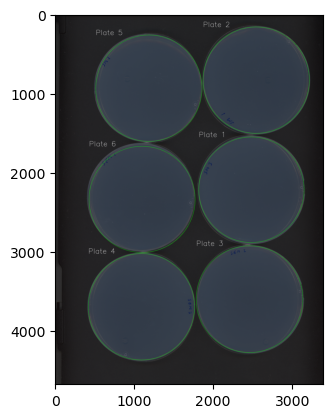

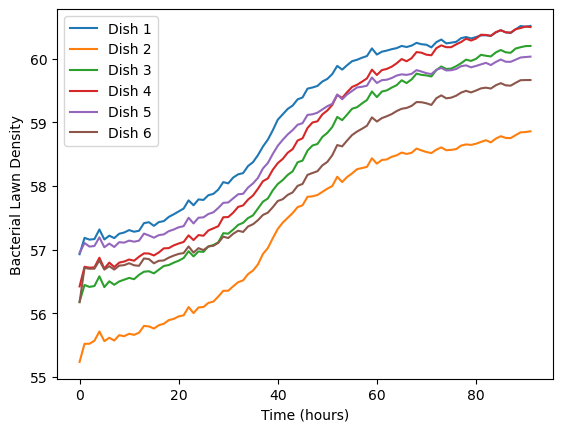

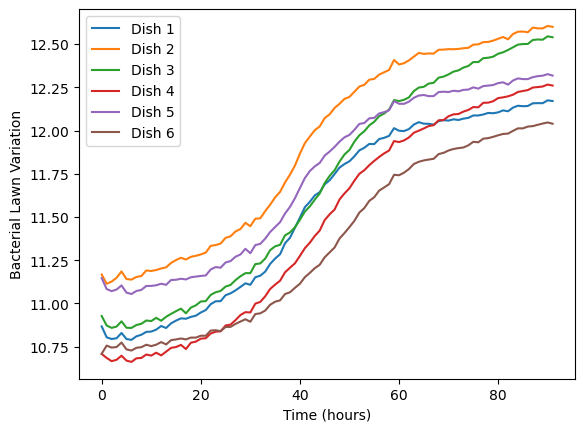

In [10]:
# Main script to load and process images, find petri dishes, and visualize results

directory = path_to_images
images = load_images(directory)

min_radius = 662
max_radius = 676

first_image = images[0]
binary_first_image = preprocess_image(first_image)
petri_dishes = find_petri_dishes(binary_first_image, min_radius, max_radius)

image_with_rectangles = draw_petri_dishes(first_image, petri_dishes)
plt.imshow(cv2.cvtColor(image_with_rectangles, cv2.COLOR_BGR2RGB))
plt.show()

densities = []
variations = []

for image in images:
    binary_image = preprocess_image(image)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    dish_densities = []
    dish_variations = []

    # Measure densities and variations for each petri dish
    for x, y, r in petri_dishes:
        cropped_gray_image = gray_image[y-r:y+r, x-r:x+r]
        cropped_binary_image = binary_image[y-r:y+r, x-r:x+r]
        density, variation = measure_density_and_variation(cropped_binary_image, cropped_gray_image)
        dish_densities.append(density)
        dish_variations.append(variation)

    densities.append(dish_densities)
    variations.append(dish_variations)

# Visualize the density results
time_points = range(len(densities))
for dish_index in range(len(petri_dishes)):
    dish_densities = [density[dish_index] for density in densities]
    plt.plot(time_points, dish_densities, label=f'Dish {dish_index + 1}')

plt.xlabel('Time (hours)')
plt.ylabel('Bacterial Lawn Density')
plt.legend()
plt.show()

# Visualize the variation results
time_points = range(len(variations))
for dish_index in range(len(petri_dishes)):
    dish_variations = [variation[dish_index] for variation in variations]
    plt.plot(time_points, dish_variations, label=f'Dish {dish_index + 1}')

plt.xlabel('Time (hours)')
plt.ylabel('Bacterial Lawn Variation')
plt.legend()
plt.show()

In [ ]:
# Export density data to CSV
header = ['Plate'] + [ i + 1 for i in range(len(time_points))]
density_data = [[f'Dish {i + 1}', *row] for i, row in enumerate(zip(*densities))]
variation_data = [[f'Dish {i + 1}', *row] for i, row in enumerate(zip(*variations))]

export_to_csv('SM_SEM_density_data.csv', header, density_data)
export_to_csv('SM_SEM_variation_data.csv', header, variation_data)
